<font color="#CA3532"><h1 align="left">Fundamentos de Análisis de Datos</h1></font>
<font color="#6E6E6E"><h2 align="left">Preprocesado de Datos con Python</h2></font>

## <font color="#CA3532">3. Transformación de los datos originales</font>

Después de la limpieza de datos, es posible que tengamos que realizar algunas transformaciones en los datos. Veremos en detalle cómo realizar las siguientes tareas:

- Normalización y / o estandarización de datos.
- Agregación de datos.
- Discretización de datos y / o dicotomización.
- Manipulación de fechas.

Otras transformaciones posibles que no están cubiertas en estas notas incluyen suavizado, segmentación de datos, compresión de series temporales, etc.

Primero hacemos todos los imports necesarios:

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot')

### <font color="#CA3532">Normalización de los datos</font>

La normalización de datos es muy importante, especialmente cuando se han medido diferentes atributos con diferentes escalas. Aplicamos la normalización solo a los atributos numéricos. Una forma de normalizar bastante común es la estandarización, que consiste en restar la media y escalar para tener una media igual a 0 y una desviación estándar igual a 1.

In [2]:
# Leer dataset "labor" y mantener sólo los atributos numéricos:
data = pd.read_csv("Datasets/labor.csv", na_values = ["?"], sep = ",")
data = data.loc[:, data.dtypes != object]
data[:10]

,dur,wage1,wage2,wage3,hours,stby_pay,shift_diff,holidays
0,1.0,5.0,NaN,NaN,40.0,NaN,2.0,11.0
1,2.0,4.5,5.8,NaN,35.0,NaN,NaN,11.0
2,NaN,NaN,NaN,NaN,38.0,NaN,5.0,11.0
3,3.0,3.7,4.0,5.0,NaN,NaN,NaN,NaN
4,3.0,4.5,4.5,5.0,40.0,NaN,NaN,12.0
5,2.0,2.0,2.5,NaN,35.0,NaN,6.0,12.0
6,3.0,4.0,5.0,5.0,NaN,NaN,NaN,12.0
7,3.0,6.9,4.8,2.3,40.0,NaN,3.0,12.0
8,2.0,3.0,7.0,NaN,38.0,12.0,25.0,11.0
9,1.0,5.7,NaN,NaN,40.0,NaN,4.0,11.0


In [3]:
# Estandarización:
data = (data - data.mean()) / data.std() # También se conoce como el "Z-Score"
data[:10]

,dur,wage1,wage2,wage3,hours,stby_pay,shift_diff,holidays
0,-1.639901,0.872926,NaN,NaN,0.782536,NaN,-0.631792,-0.074885
1,-0.227063,0.508121,1.570633,NaN,-1.212931,NaN,NaN,-0.074885
2,NaN,NaN,NaN,NaN,-0.015651,NaN,0.028395,-0.074885
3,1.185775,-0.075567,0.024279,0.833132,NaN,NaN,NaN,NaN
4,1.185775,0.508121,0.453821,0.833132,0.782536,NaN,NaN,0.718895
5,-0.227063,-1.315903,-1.264350,NaN,-1.212931,NaN,0.248457,0.718895
6,1.185775,0.143316,0.883364,0.833132,NaN,NaN,NaN,0.718895
7,1.185775,2.259185,0.711547,-1.236920,0.782536,NaN,-0.411729,0.718895
8,-0.227063,-0.586294,2.601536,NaN,-0.015651,0.906091,4.429641,-0.074885
9,-1.639901,1.383653,NaN,NaN,0.782536,NaN,-0.191667,-0.074885


In [4]:
# Chequear que las medias son ahora 0 (o prácticamente 0):
data.mean()

dur           9.516197e-17
wage1         3.727177e-16
wage2        -2.799693e-16
wage3        -1.896631e-16
hours         8.707632e-18
stby_pay     -6.167906e-17
shift_diff   -1.432546e-17
holidays     -2.010970e-16
dtype: float64

In [5]:
# Chequear que las stds son ahora 1:
data.std()

dur           1.0
wage1         1.0
wage2         1.0
wage3         1.0
hours         1.0
stby_pay      1.0
shift_diff    1.0
holidays      1.0
dtype: float64

### <font color="#CA3532">Agregación de datos</font>


In [6]:
# Load adult data set:
data = pd.read_csv("Datasets/adult.csv", na_values = ["?"], sep = ",")
data[:10]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [7]:
# Agregar por campo education, calculando medias de atributos numéricos:
grouped = data.groupby(data["education"])
education_means = grouped.aggregate(np.mean)
education_means

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
education,,,,,,
10th,37.429796,196832.465166,6.0,404.574491,56.845659,37.052519
11th,32.355745,194928.077447,7.0,215.097872,50.079149,33.925957
12th,32.000000,199097.508083,8.0,284.087760,32.337182,35.780600
1st-4th,46.142857,239303.000000,2.0,125.875000,48.327381,38.255952
5th-6th,42.885886,232448.333333,3.0,176.021021,68.252252,38.897898
7th-8th,48.445820,188079.171827,4.0,233.939628,65.668731,39.366873
9th,41.060311,202485.066148,5.0,342.089494,28.998054,38.044747
Assoc-acdm,37.381443,193424.093721,12.0,640.399250,93.418932,40.504217
Assoc-voc,38.553546,181936.016643,11.0,715.051375,72.754703,41.610709


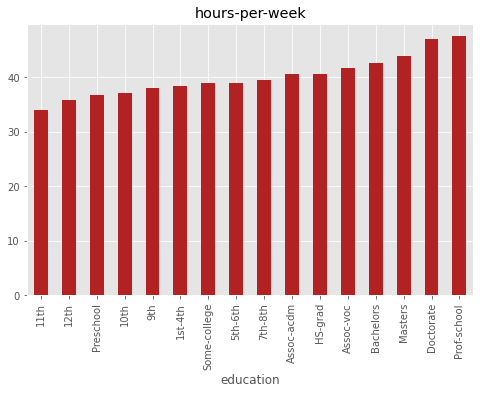

In [8]:
# Mostrar gráfica media hours-per-week versus education:
var = "hours-per-week"
h = education_means[var].sort_values().plot(kind = 'bar', figsize = (8, 5),
                                            title = var, color = 'firebrick')

In [9]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
# Agregar por education, calculando frecuencia de salary >50K:
def rate50(x):
    return float(np.sum(x == ">50K")) / len(x)
    
grouped = data["class"].groupby(data["education"])
education_salary_50K = grouped.aggregate(rate50)
education_salary_50K

education
10th            0.066452
11th            0.051064
12th            0.076212
1st-4th         0.035714
5th-6th         0.048048
7th-8th         0.061920
9th             0.052529
Assoc-acdm      0.248360
Assoc-voc       0.261216
Bachelors       0.414753
Doctorate       0.740920
HS-grad         0.159509
Masters         0.556587
Preschool       0.000000
Prof-school     0.734375
Some-college    0.190235
Name: class, dtype: float64

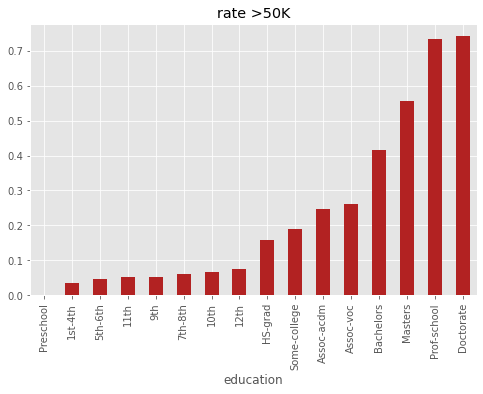

In [11]:
# Gráfica de frecuencia de salary >50K versus education:
h = education_salary_50K.sort_values().plot(kind = 'bar', figsize = (8, 5),
                                            title = "rate >50K", color = 'firebrick')

### <font color="#CA3532">Discretización de los datos</font>

In [12]:
# Cargar dataset "adult" y mantener los primeros 6 atributos:
data = pd.read_csv("Datasets/adult.csv", na_values = ["?"], sep = ",")
data = data.iloc[:,:6]
data[:10]

,age,workclass,fnlwgt,education,education-num,marital-status
0,39,State-gov,77516,Bachelors,13,Never-married
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse
2,38,Private,215646,HS-grad,9,Divorced
3,53,Private,234721,11th,7,Married-civ-spouse
4,28,Private,338409,Bachelors,13,Married-civ-spouse
5,37,Private,284582,Masters,14,Married-civ-spouse
6,49,Private,160187,9th,5,Married-spouse-absent
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse
8,31,Private,45781,Masters,14,Never-married
9,42,Private,159449,Bachelors,13,Married-civ-spouse


In [13]:
# Discretizar "age" en 5 grupos:
age = data["age"]
bins = [0, 20, 30, 45, 65, 100]
age_discretized = pd.cut(age, bins)
age_discretized[:10]

0    (30, 45]
1    (45, 65]
2    (30, 45]
3    (45, 65]
4    (20, 30]
5    (30, 45]
6    (45, 65]
7    (45, 65]
8    (30, 45]
9    (30, 45]
Name: age, dtype: category
Categories (5, interval[int64]): [(0, 20] < (20, 30] < (30, 45] < (45, 65] < (65, 100]]

In [14]:
# Número de casos en cada rango de edad:
age_discretized.value_counts().sort_index()

(0, 20]       2410
(20, 30]      8162
(30, 45]     12362
(45, 65]      8469
(65, 100]     1158
Name: age, dtype: int64

In [15]:
# Añadir edad discretizada a los datos: 
data.insert(1, "age-discretized", age_discretized)
data[:10]

,age,age-discretized,workclass,fnlwgt,education,education-num,marital-status
0,39,"(30, 45]",State-gov,77516,Bachelors,13,Never-married
1,50,"(45, 65]",Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse
2,38,"(30, 45]",Private,215646,HS-grad,9,Divorced
3,53,"(45, 65]",Private,234721,11th,7,Married-civ-spouse
4,28,"(20, 30]",Private,338409,Bachelors,13,Married-civ-spouse
5,37,"(30, 45]",Private,284582,Masters,14,Married-civ-spouse
6,49,"(45, 65]",Private,160187,9th,5,Married-spouse-absent
7,52,"(45, 65]",Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse
8,31,"(30, 45]",Private,45781,Masters,14,Never-married
9,42,"(30, 45]",Private,159449,Bachelors,13,Married-civ-spouse


In [16]:
data.dtypes

age                   int64
age-discretized    category
workclass            object
fnlwgt                int64
education            object
education-num         int64
marital-status       object
dtype: object

### <font color="#CA3532">Dicotomización</font>

Convertir una variable categórica con *k* valores diferentes en *k* atributos binarios diferentes ("*one-hot* encoding").

In [17]:
# cargar el dataset "adult" y mantener los 6 primeros atributos:
data = pd.read_csv("Datasets/adult.csv", na_values = ["?"], sep = ",")
data = data.iloc[:,:6]
data[:10]

,age,workclass,fnlwgt,education,education-num,marital-status
0,39,State-gov,77516,Bachelors,13,Never-married
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse
2,38,Private,215646,HS-grad,9,Divorced
3,53,Private,234721,11th,7,Married-civ-spouse
4,28,Private,338409,Bachelors,13,Married-civ-spouse
5,37,Private,284582,Masters,14,Married-civ-spouse
6,49,Private,160187,9th,5,Married-spouse-absent
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse
8,31,Private,45781,Masters,14,Never-married
9,42,Private,159449,Bachelors,13,Married-civ-spouse


In [18]:
data["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [19]:
pd.get_dummies(data).head(5)

,age,fnlwgt,education-num,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,39,77516,13,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,38,215646,9,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,53,234721,7,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,28,338409,13,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
pd.get_dummies(data)

,age,fnlwgt,education-num,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,39,77516,13,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,38,215646,9,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,53,234721,7,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,28,338409,13,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
32557,40,154374,9,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
32558,58,151910,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32559,22,201490,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
# Dicotomizar la columna "marital-status":
dummies = pd.get_dummies(data["marital-status"])
dummies[:10]

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
5,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0
7,0,0,1,0,0,0,0
8,0,0,0,0,1,0,0
9,0,0,1,0,0,0,0


In [22]:
#?pd.merge

In [23]:
# Combinar las dos matrices de datos:
new_data = pd.merge(data, dummies, left_index = True, right_index = True)
new_data[:10]

,age,workclass,fnlwgt,education,education-num,marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,39,State-gov,77516,Bachelors,13,Never-married,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,0,0,1,0,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,1,0,0,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,0,0,1,0,0,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,0,0,1,0,0,0,0
5,37,Private,284582,Masters,14,Married-civ-spouse,0,0,1,0,0,0,0
6,49,Private,160187,9th,5,Married-spouse-absent,0,0,0,1,0,0,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,0,0,1,0,0,0,0
8,31,Private,45781,Masters,14,Never-married,0,0,0,0,1,0,0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,0,0,1,0,0,0,0


### <font color="#CA3532">Manipulación de fechas</font>

In [24]:
# Simple example with dates:
data = pd.DataFrame({"id": [1, 2, 3, 4, 5],
                     "birth": ["3/27/1989", "12/26/1998", "4/19/1972",
                               "7/21/1967", "2/22/1976"]}) 
data

,id,birth
0,1,3/27/1989
1,2,12/26/1998
2,3,4/19/1972
3,4,7/21/1967
4,5,2/22/1976


In [25]:
# Convertir la cadena "birth" a un objeto "datetime" de Python: 
from datetime import datetime

In [26]:
# Algunas pruebas:
ref = datetime.strptime("150318","%d%m%y")
#ref = datetime.strptime("15032018","%d%m%Y")
nueva = datetime.strptime("23-04-2018","%d-%m-%Y")
#(nueva-ref).days()
a=(nueva-ref)
a.days

39

In [27]:
data["birth"]

0     3/27/1989
1    12/26/1998
2     4/19/1972
3     7/21/1967
4     2/22/1976
Name: birth, dtype: object

In [28]:
birth_date = [datetime.strptime(x, "%m/%d/%Y") for x in data["birth"]]
birth_date

[datetime.datetime(1989, 3, 27, 0, 0),
 datetime.datetime(1998, 12, 26, 0, 0),
 datetime.datetime(1972, 4, 19, 0, 0),
 datetime.datetime(1967, 7, 21, 0, 0),
 datetime.datetime(1976, 2, 22, 0, 0)]

In [29]:
# Convertir "birth" a edad (en años) usando la
# fecha 4/10/2010 como referencia:
#reference = datetime(2010, 4, 10, 0, 0, 0, 0)
reference = datetime.today()
age = [((reference - x).days/365.25) for x in birth_date]
age

[31.920602327173167,
 22.171115674195757,
 48.85694729637235,
 53.60438056125941,
 45.01300479123888]

In [30]:
# Eliminar la columna "birth" de data e insertar columna "age":
del data["birth"]
data.insert(1, "age", age)
data

,id,age
0,1,31.920602
1,2,22.171116
2,3,48.856947
3,4,53.604381
4,5,45.013005


### <font color="#CA3532">Ejercicio</font>

Carga la base de datos *loan* y transforma las variables que lo necesiten.